In [55]:
from __future__ import print_function, division

%matplotlib inline
#%matplotlib notebook

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [56]:
df = pd.read_csv('C:/Users/Trypt/Desktop/KBB/DB files/car_data_clean_complete_v4.csv')

In [57]:
df = df.drop(df[df["make_ss"] == "Panoz"].index | df[df["make_ss"] == "Daewoo"].index | df[df["make_ss"] == "Maybach"].index | df[df["make_ss"] == "AM General"].index | df[df["make_ss"] == "Geo"].index | df[df["make_ss"] == "Fisker"].index | df[df["make_ss"] == "Alfa Romeo"].index | df[df["make_ss"] == "Lotus"].index | df[df["make_ss"] == "McLaren"].index | df[df["make_ss"] == "Plymouth"].index | df[df["make_ss"] == "Isuzu"].index | df[df["make_ss"] == "Oldsmobile"].index | df[df["make_ss"] == "Lamborghini"].index | df[df["make_ss"] == "Rolls-Royce"].index | df[df["make_ss"] == "Aston Martin"].index | df[df["make_ss"] == "Saab"].index | df[df["make_ss"] == "smart"].index | df[df["make_ss"] == "Suzuki"].index | df[df["make_ss"] == "Infiniti"].index | df[df["make_ss"] == "Ferrari"].index | df[df["make_ss"] == "Bentley"].index | df[df["make_ss"] == "Maserati"].index | df[df["make_ss"] == "HUMMER"].index | df[df["make_ss"] == "Mercury"].index | df[df["make_ss"] == "Saturn"].index | df[df["make_ss"] == "FIAT"].index | df[df["make_ss"] == "Pontiac"].index | df[df["make_ss"] == "Jaguar"].index | df[df["make_ss"] == "Scion"].index | df[df["make_ss"] == "Mitsubishi"].index | df[df["make_ss"] == "Porsche"].index | df[df["make_ss"] == "Volvo"].index | df[df["make_ss"] == "MINI"].index | df[df["make_ss"] == "Land Rover"].index | df[df["make_ss"] == "Lincoln"].index)
expcars = (df['price_fs'] > 5000) & (df['price_fs'] < 100000)
df = df[expcars]
df = df.drop_duplicates(['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income'])
df["make_ss"].value_counts().sort_values(ascending = False)

Chevrolet        182008
Ford             175152
Toyota           116868
Nissan           103032
Honda             88502
Jeep              77083
Hyundai           56976
BMW               53184
GMC               53096
Lexus             52362
Dodge             46364
Kia               40702
Ram               38046
Mercedes-Benz     34725
Volkswagen        31070
Subaru            24737
Acura             24568
Cadillac          24238
Mazda             23527
Buick             22356
Chrysler          17699
Audi              16839
INFINITI          16031
Name: make_ss, dtype: int64

In [58]:
states = pd.DataFrame(df.groupby('State full').mean())

In [59]:
states = states.reset_index()

In [60]:
df["State full"].value_counts().sort_values(ascending = False)

North Carolina    145294
Florida           101586
Texas              98738
California         93505
Georgia            69999
Pennsylvania       59635
New York           58995
Virginia           57938
Ohio               57025
Illinois           47393
Michigan           41767
South Carolina     41745
Tennessee          38314
Wisconsin          37389
Maryland           34468
Indiana            30075
Missouri           30039
Washington         21847
Kentucky           21517
Kansas             20920
Colorado           20015
Minnesota          19370
Alabama            19019
Iowa               16026
Arizona            14111
Oklahoma           13525
Nebraska           12168
Oregon             11691
Arkansas           11471
Utah               11069
Mississippi         9988
Louisiana           8734
Nevada              6348
Idaho               5823
Delaware            5619
West Virginia       4349
South Dakota        4211
New Mexico          3394
North Dakota        3122
Montana             2986


In [62]:
statesmedian = pd.DataFrame(df.groupby('State full').median())
statesmedian = statesmedian.reset_index()

,State full,price_fs,miles_fs,year_is,engine_size_ss,doors_is,cylinders_is,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,AGE,zip,decommissioned,latitude,longitude,irs_estimated_population_2015,Population,Number of households
0,Alabama,19949.0,46656.0,2015.0,3.5,4.0,6.0,55.0,32.0,19990.0,30.0,0.0,4.0,35216.0,0.0,33.42,-86.79,32940.0,413188.0,155178.0
1,Arizona,18000.0,45063.0,2015.0,3.0,4.0,6.0,47.0,27.0,19547.0,25.0,0.0,4.0,85286.0,0.0,33.44,-111.92,30300.0,3889161.0,1411727.0
2,Arkansas,19877.0,47536.0,2015.0,3.5,4.0,6.0,66.0,33.0,19995.0,30.0,0.0,4.0,72396.0,0.0,35.31,-92.65,21620.0,207911.0,79214.0
3,California,19500.0,41141.0,2015.0,2.5,4.0,4.0,42.0,27.0,19950.0,25.0,0.0,4.0,93230.0,0.0,34.72,-119.06,37240.0,1812208.0,603879.0
4,Colorado,20639.0,49122.0,2015.0,3.5,4.0,6.0,48.0,31.0,20988.0,28.0,0.0,4.0,80501.0,0.0,39.64,-104.95,27340.0,540669.0,219562.0
5,Connecticut,16036.0,53092.5,2014.0,2.5,4.0,4.0,66.5,48.5,16494.0,46.0,0.0,5.0,6379.0,0.0,41.53,-72.65,21420.0,862611.0,328013.0
6,Delaware,19395.0,42910.0,2015.0,2.5,4.0,6.0,66.0,40.0,20120.0,38.0,0.0,4.0,19901.0,0.0,39.15,-75.57,29230.0,200632.0,76444.0
7,Florida,18476.0,41308.5,2015.0,2.5,4.0,4.0,45.0,26.0,18995.0,25.0,0.0,4.0,33142.0,0.0,27.94,-81.43,25080.0,872598.0,330897.0
8,Georgia,19987.0,43601.0,2015.0,3.0,4.0,6.0,50.0,30.0,19999.0,27.0,0.0,4.0,30265.0,0.0,33.95,-84.15,34770.0,700308.0,264496.0
9,Idaho,21988.0,48450.0,2015.0,3.6,4.0,6.0,72.0,43.0,22135.0,38.0,0.0,4.0,83704.0,0.0,43.63,-116.21,20750.0,105580.0,36066.0


In [63]:
states["median"] = statesmedian['price_fs']

In [111]:
sns.set(font_scale=2, rc={'figure.figsize':(18, 18)})

## Mean Vehicle Price by State

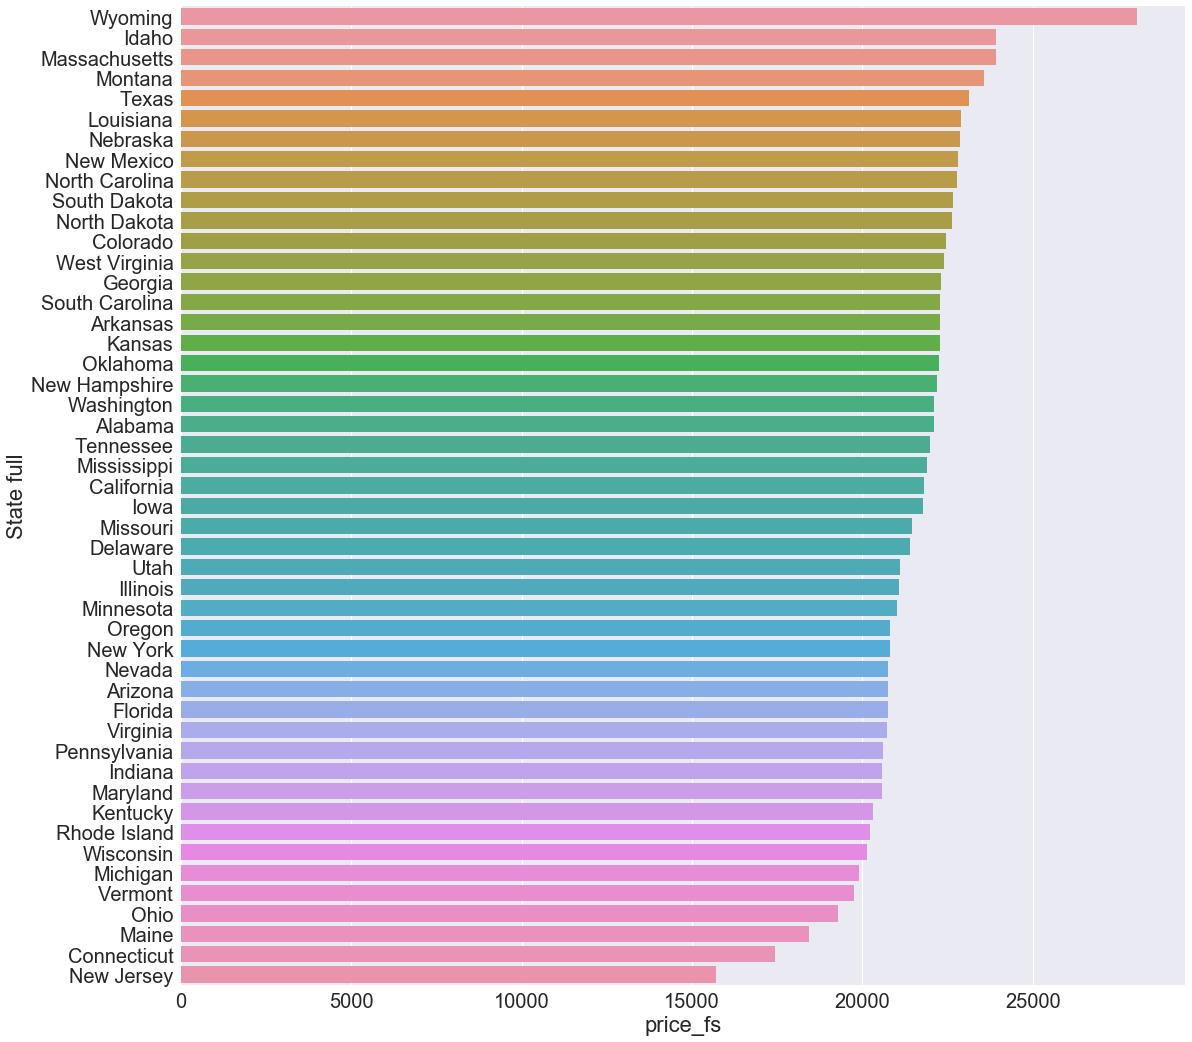

In [114]:
states.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=states, label="Mean")

## Median Vehicle Price by State

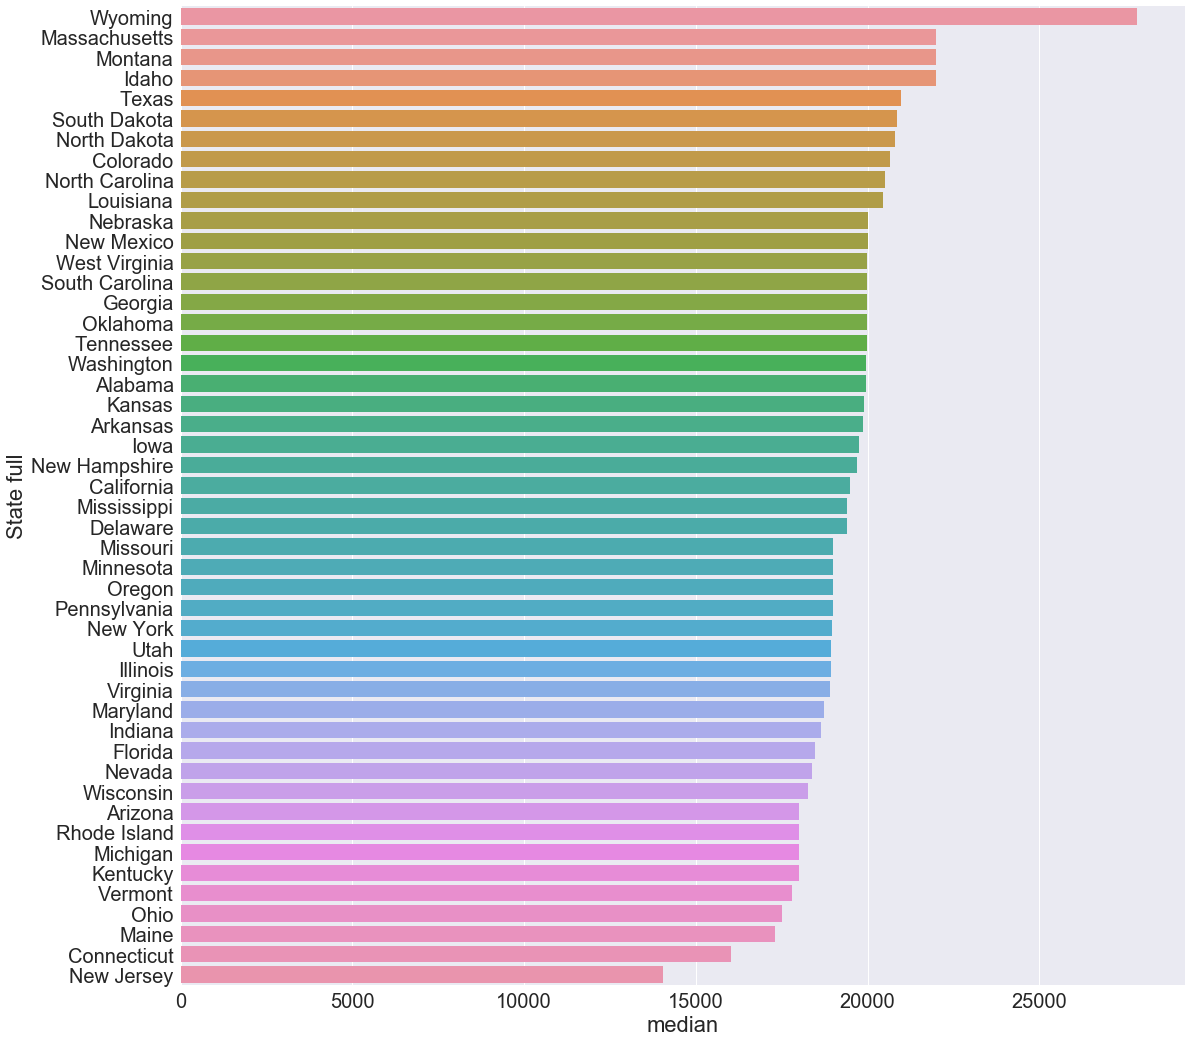

In [115]:
states.sort_values('median', ascending=False, inplace=True)
sns.barplot(x="median", y="State full", data=states, label="Mean")

## Mean and Median overlap Vehicle Price by State

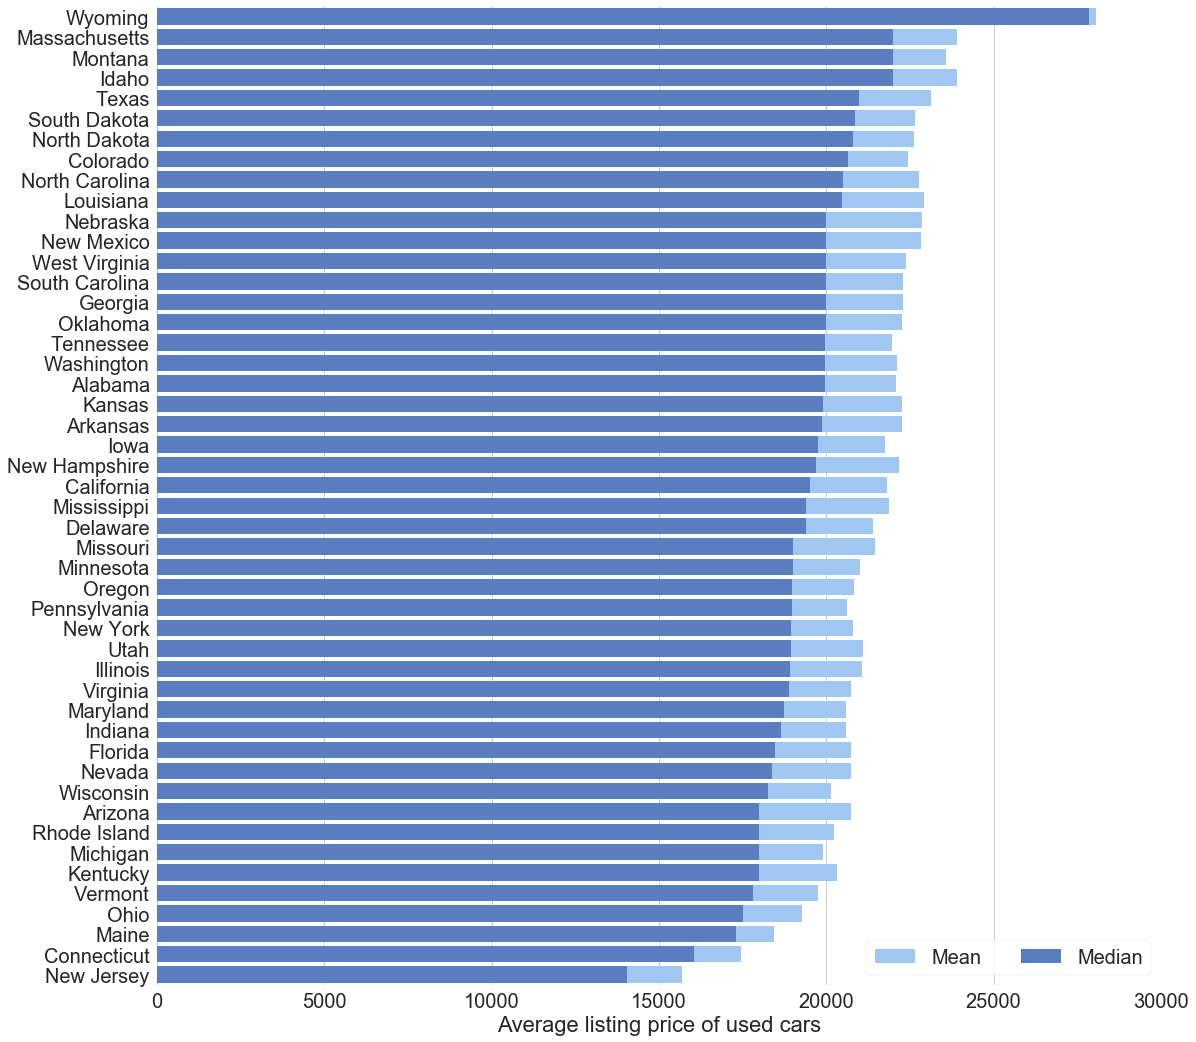

In [116]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 18))
sns.set_color_codes("pastel")
sns.barplot(x="price_fs", y="State full", data=states, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="State full", data=states, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,30000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

In [182]:
df["State full"].value_counts().sort_values(ascending = False)

North Carolina    145294
Florida           101586
Texas              98738
California         93505
Georgia            69999
Pennsylvania       59635
New York           58995
Virginia           57938
Ohio               57025
Illinois           47393
Michigan           41767
South Carolina     41745
Tennessee          38314
Wisconsin          37389
Maryland           34468
Indiana            30075
Missouri           30039
Washington         21847
Kentucky           21517
Kansas             20920
Colorado           20015
Minnesota          19370
Alabama            19019
Iowa               16026
Arizona            14111
Oklahoma           13525
Nebraska           12168
Oregon             11691
Arkansas           11471
Utah               11069
Mississippi         9988
Louisiana           8734
Nevada              6348
Idaho               5823
Delaware            5619
West Virginia       4349
South Dakota        4211
New Mexico          3394
North Dakota        3122
Montana             2986


## Mean Vehicle Price by Region

In [71]:
regions = pd.DataFrame(df.groupby('Regions').mean())
regions = regions.reset_index()
regionsmedian = pd.DataFrame(df.groupby('Regions').median())
regionsmedian = regionsmedian.reset_index()
regions["median"] = regionsmedian['price_fs']

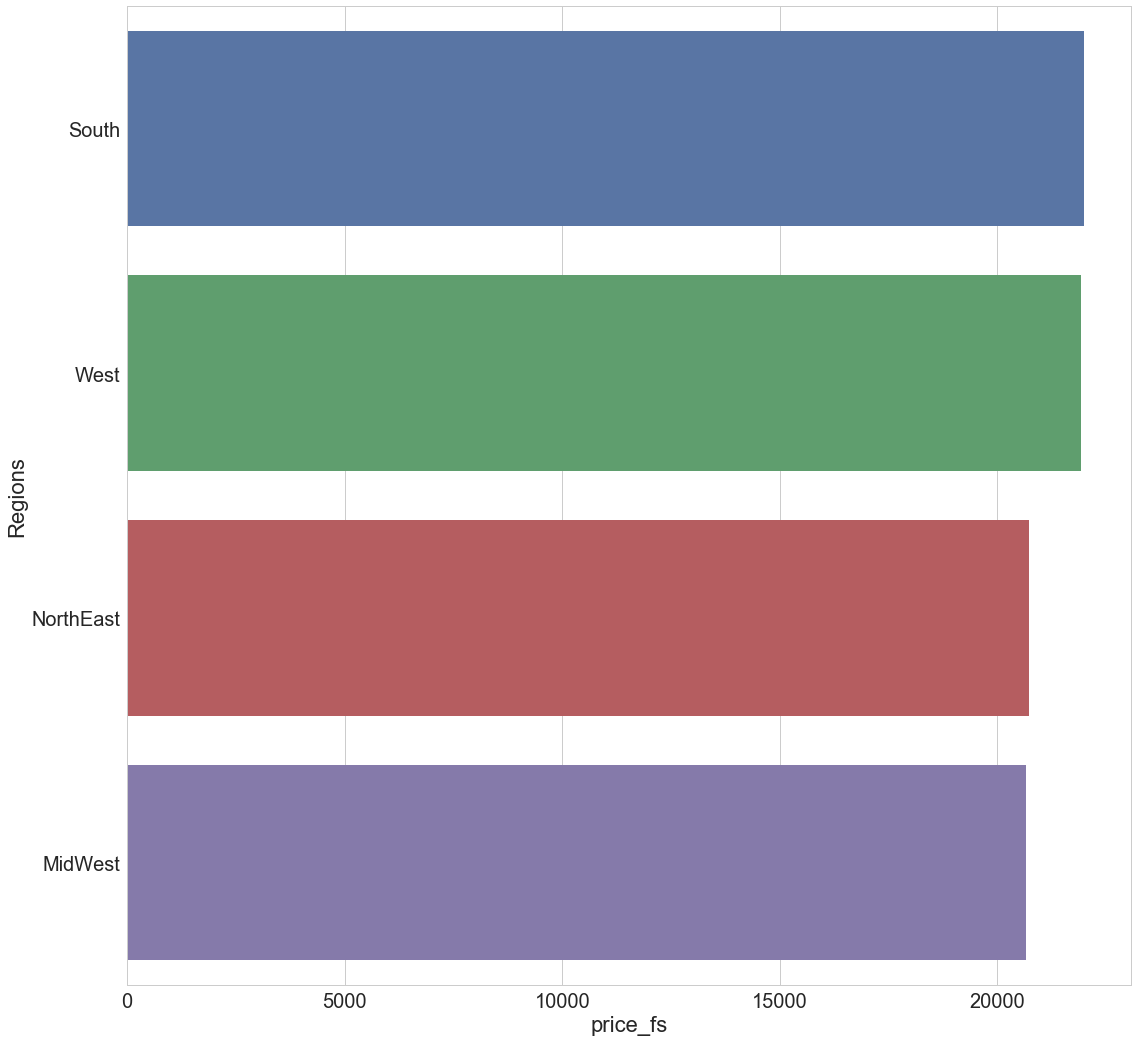

In [117]:
regions.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="Regions", data=regions, label="Mean")

## Median Car Price by Region

I would posit the price is lower in NorthEast because it is contains many urban areas that you can more easily get by without a car, lowering demand. Likewise, demand may be lower in the MidWest because it is a lower population area.

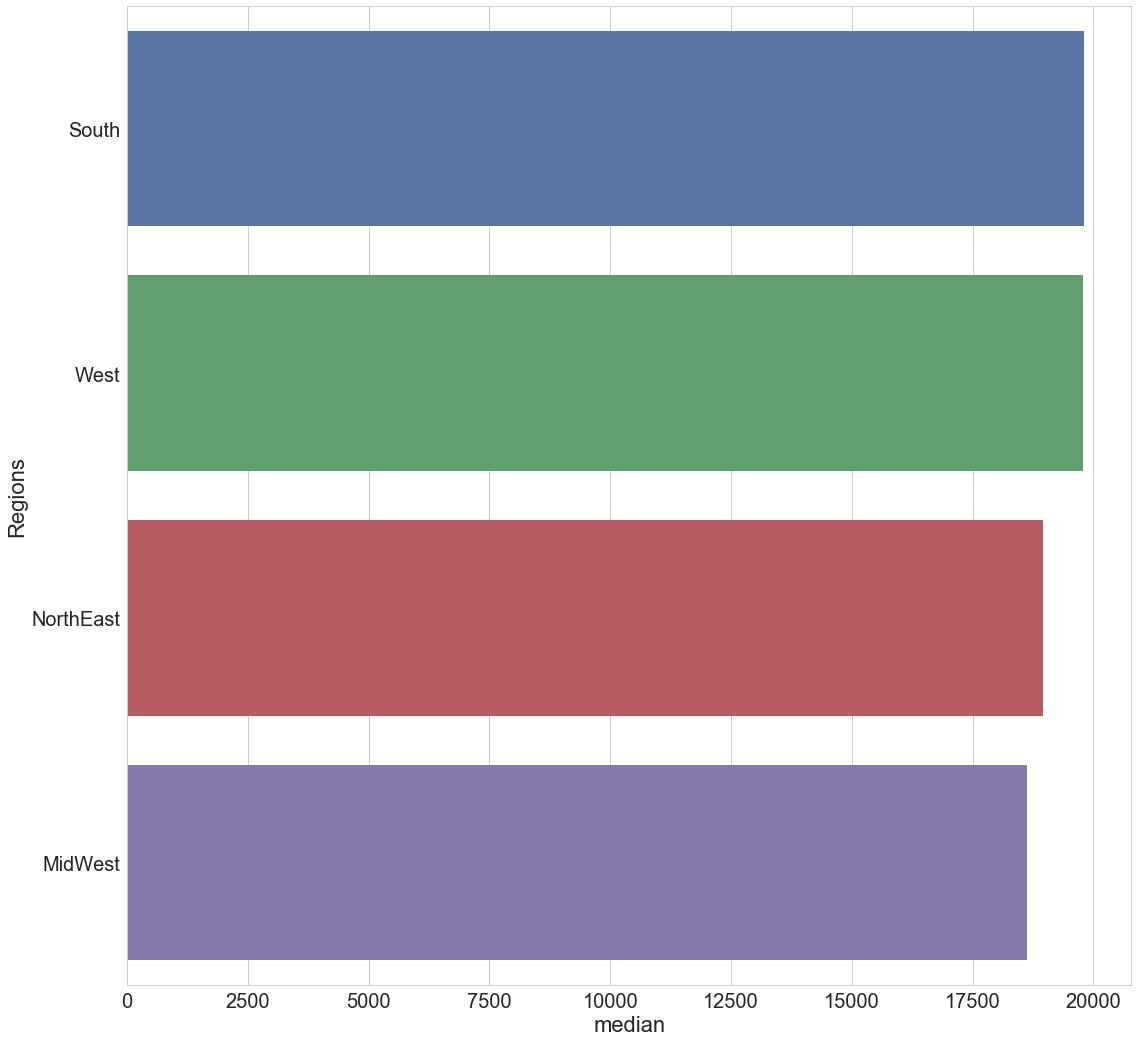

In [118]:
regions.sort_values('median', ascending=False, inplace=True)
sns.barplot(x="median", y="Regions", data=regions, label="Median")

## Mean and Median overlap Car Price by Region


I would posit the price is lower in NorthEast because it is contains many urban areas that you can more easily get by without a car, lowering demand. Likewise, demand may be lower in the MidWest because it is a lower population area.

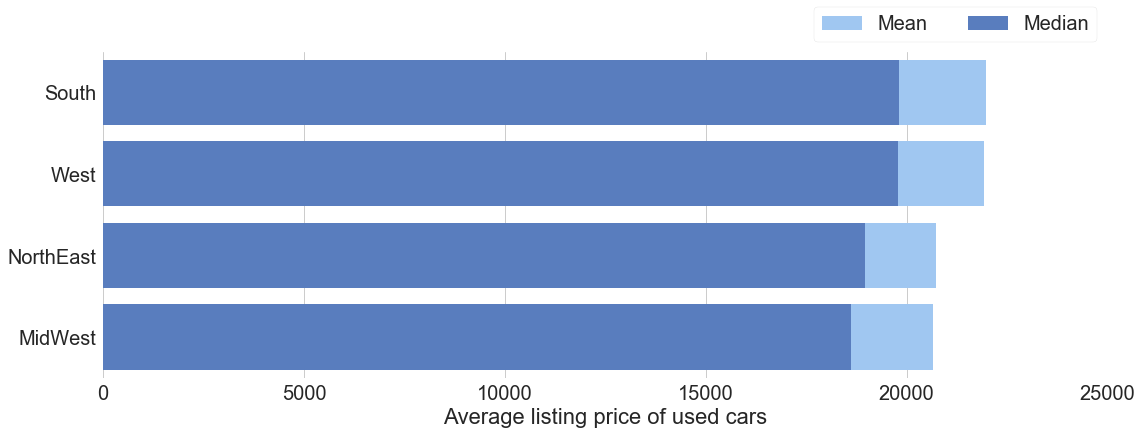

In [119]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 6))
sns.set_color_codes("pastel")
sns.barplot(x="price_fs", y="Regions", data=regions, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="median", y="Regions", data=regions, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True, bbox_to_anchor=(1, 1))
ax.set(xlim=(0,25000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

In [123]:
chevy = df[(df["make_ss"] == "Chevrolet")]
chevy = pd.DataFrame(chevy.groupby('State full').median())
chevy = chevy.reset_index()

ford = df[(df["make_ss"] == "Ford")]
ford = pd.DataFrame(ford.groupby('State full').median())
ford = ford.reset_index()

toyota = df[(df["make_ss"] == "Toyota")]
toyota = pd.DataFrame(toyota.groupby('State full').median())
toyota = toyota.reset_index()

nissan = df[(df["make_ss"] == "Nissan")]
nissan = pd.DataFrame(nissan.groupby('State full').median())
nissan = nissan.reset_index()

honda = df[(df["make_ss"] == "Honda")]
honda = pd.DataFrame(honda.groupby('State full').median())
honda = honda.reset_index()

## Chevy Median price by State

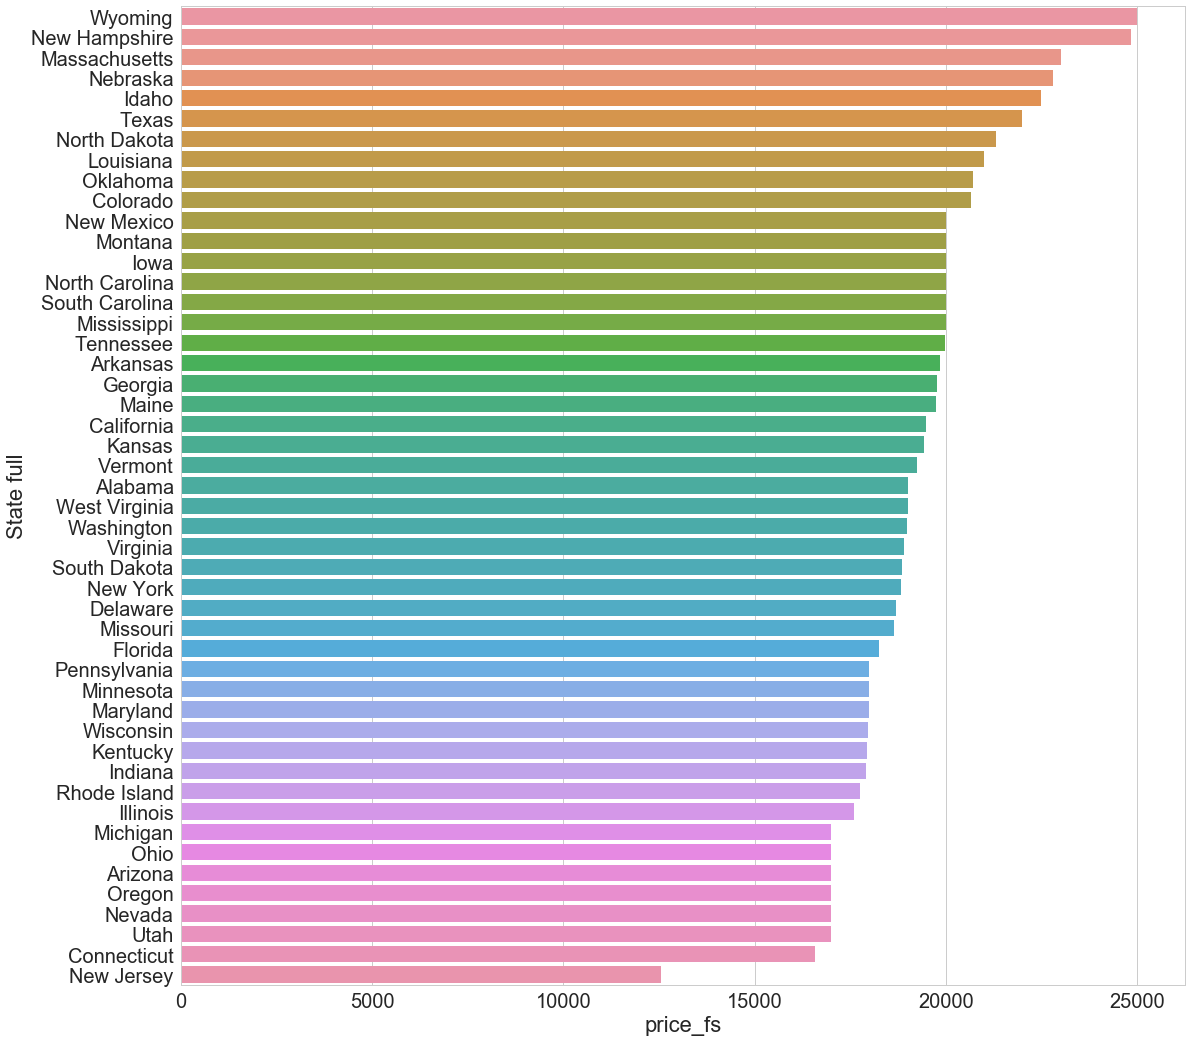

In [124]:
chevy.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=chevy, label="Median")

## Ford Median price by State

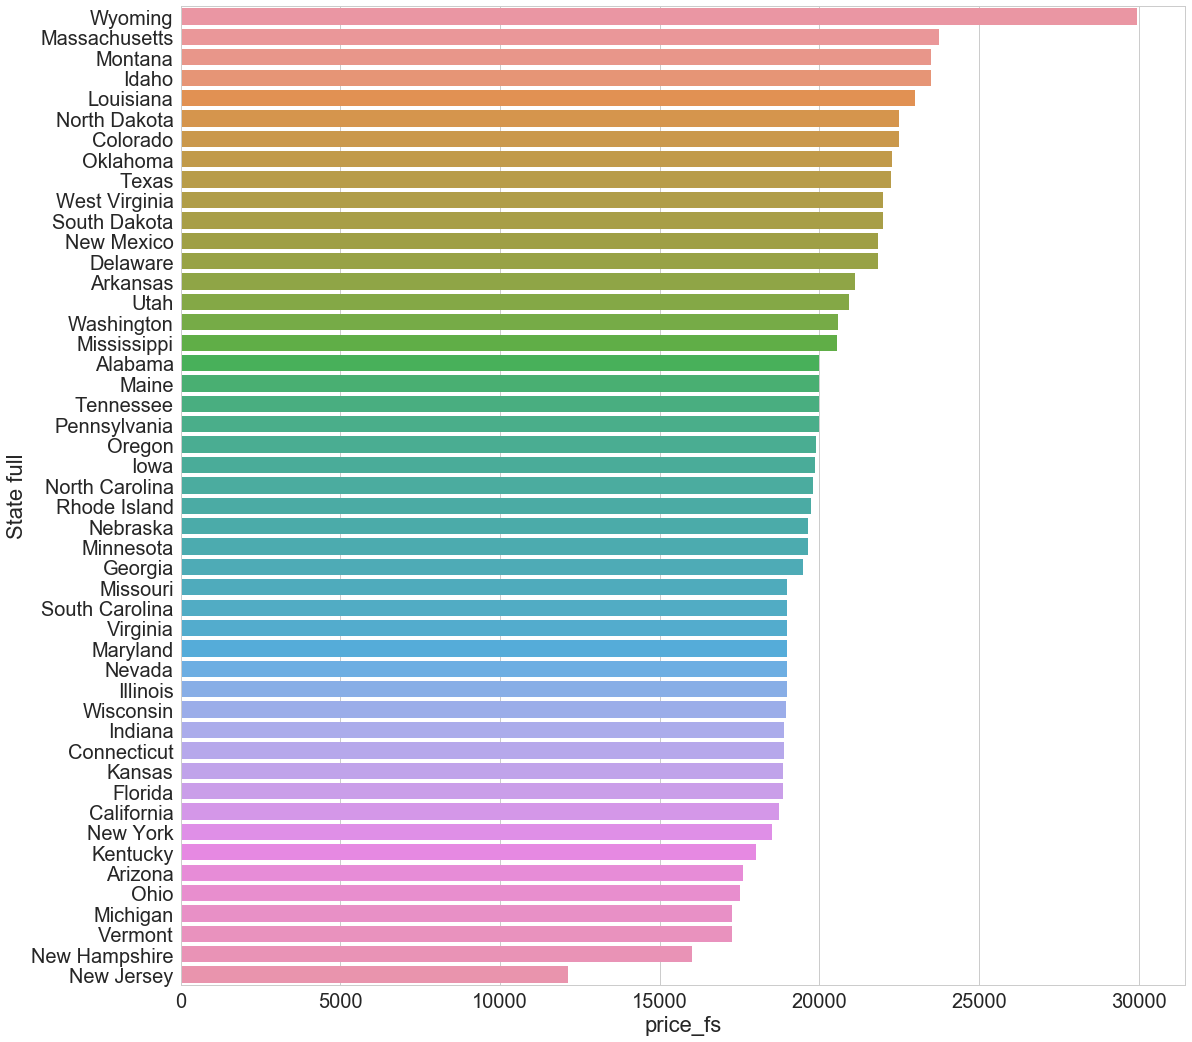

In [125]:
ford.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=ford, label="Median")

## Toyota Median price by State

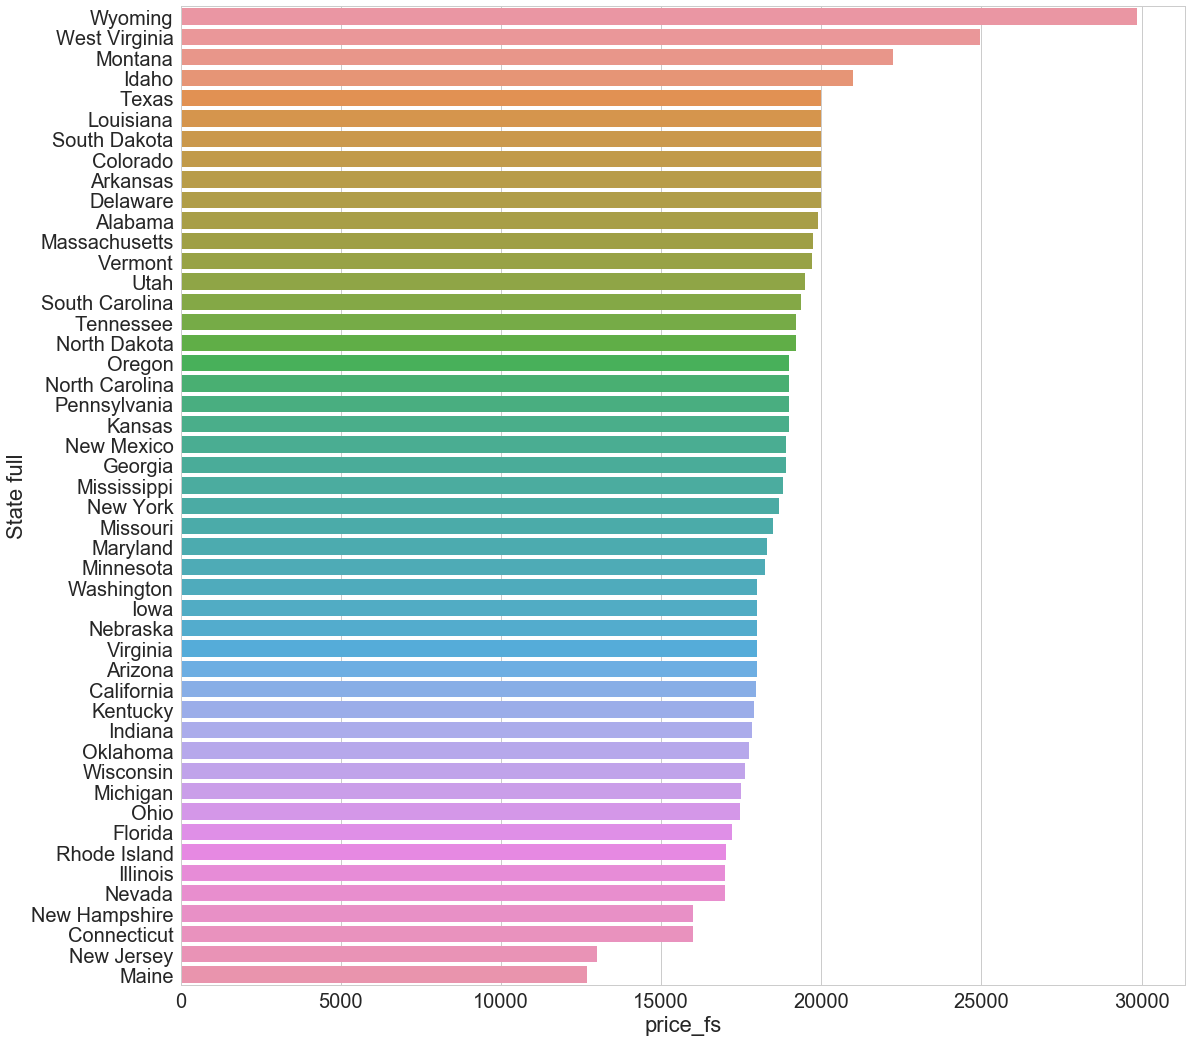

In [127]:
toyota.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=toyota, label="Median")

## Nissan Median price by State

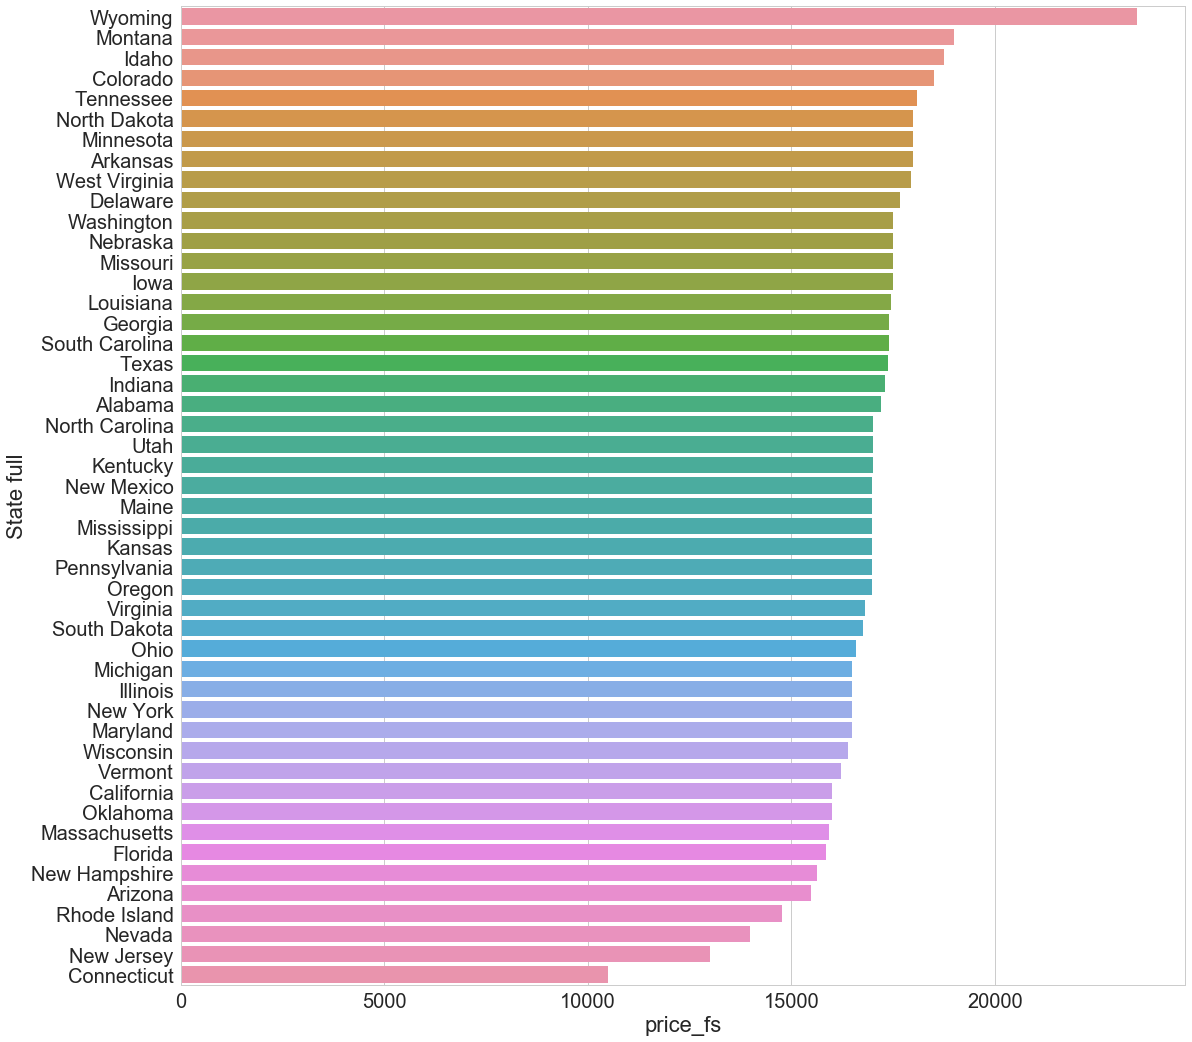

In [128]:
nissan.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=nissan, label="Median")

## Honda Median price by State

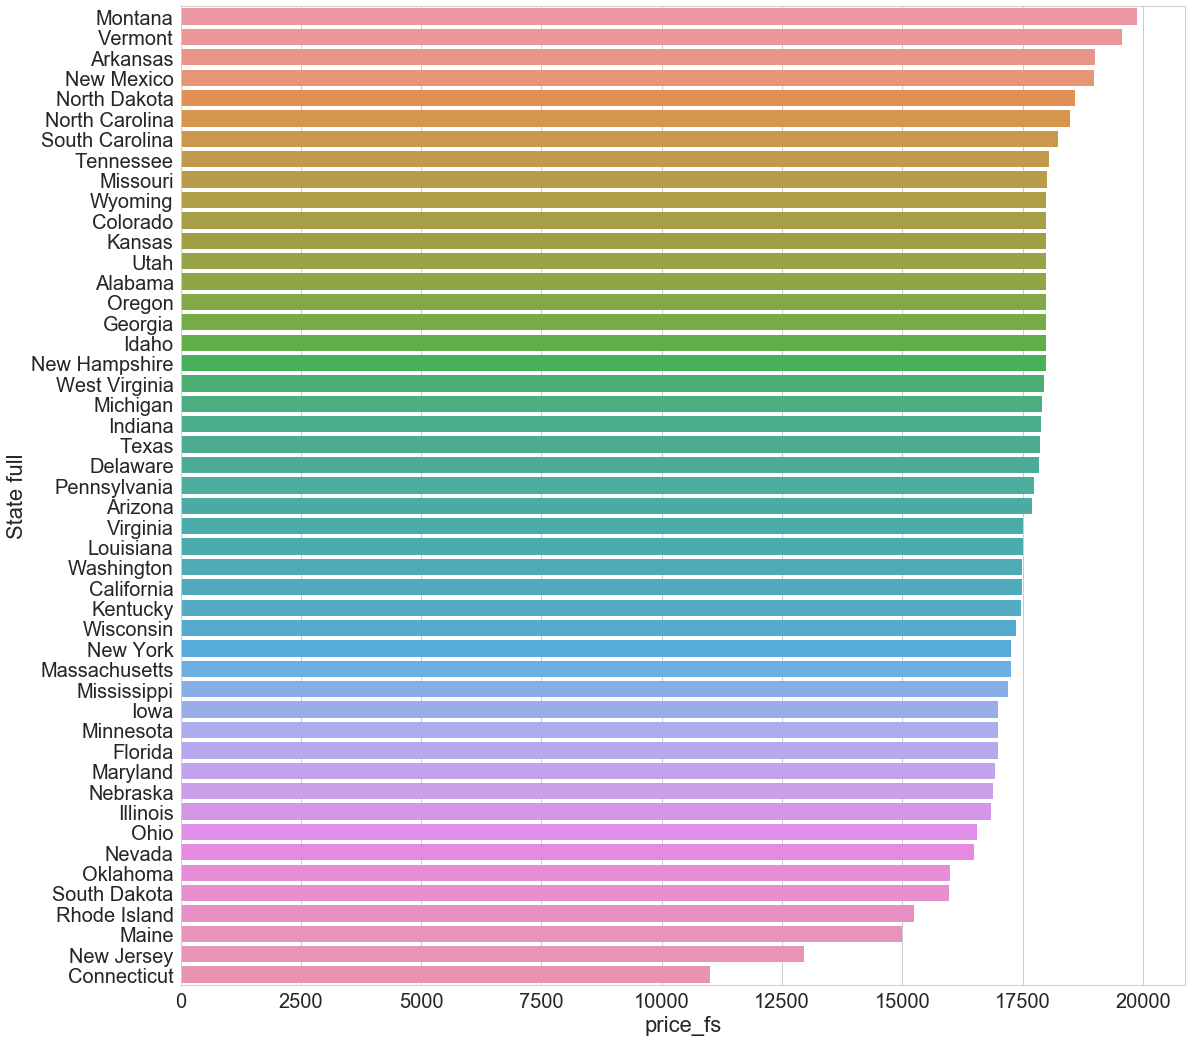

In [129]:
honda.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=honda, label="Median")

## Vehicle counts by State broken in Types

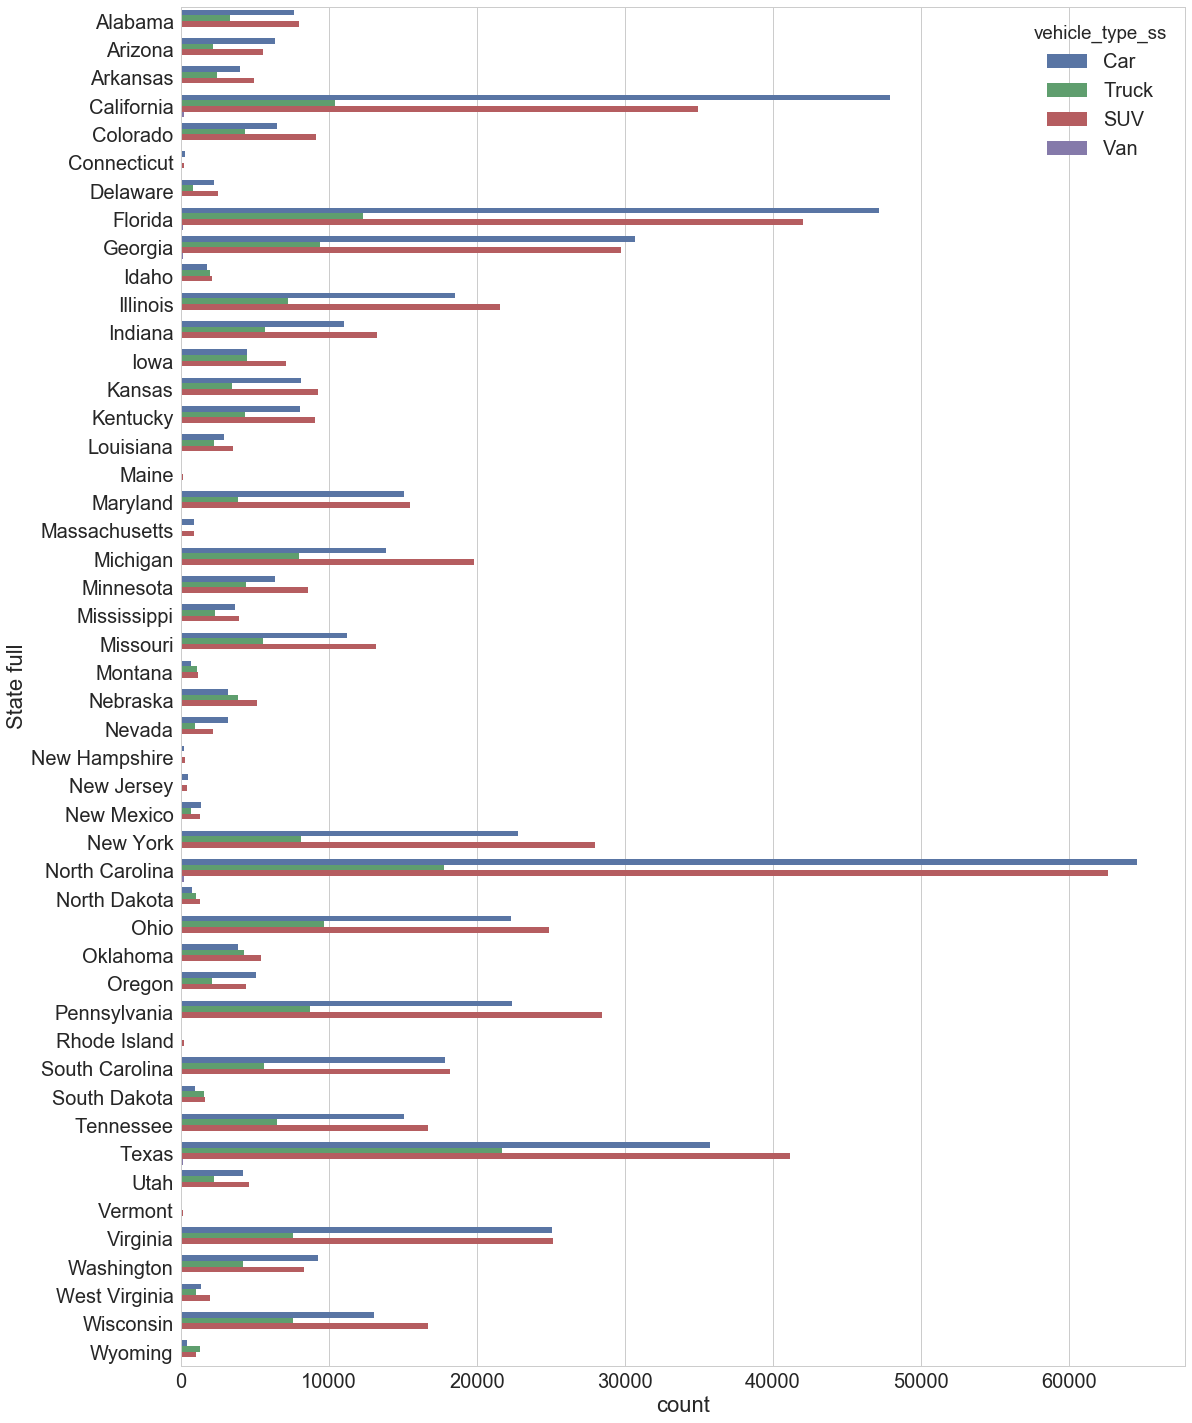

In [190]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 25))
vehiclecount = df.sort_values('State full', ascending=True, inplace=False)
sns.countplot(y="State full", hue="vehicle_type_ss", data=vehiclecount)

In [200]:
sns.set(font_scale=2, rc={'figure.figsize':(18, 18)})

In [134]:
suv = df[(df["vehicle_type_ss"] == "SUV")]
suv = pd.DataFrame(suv.groupby('State full').median())
suv = suv.reset_index()

car = df[(df["vehicle_type_ss"] == "Car")]
car = pd.DataFrame(car.groupby('State full').median())
car = car.reset_index()

truck = df[(df["vehicle_type_ss"] == "Truck")]
truck = pd.DataFrame(truck.groupby('State full').median())
truck = truck.reset_index()

van = df[(df["vehicle_type_ss"] == "Van")]
van = pd.DataFrame(van.groupby('State full').median())
van = van.reset_index()

## SUV Median price by State

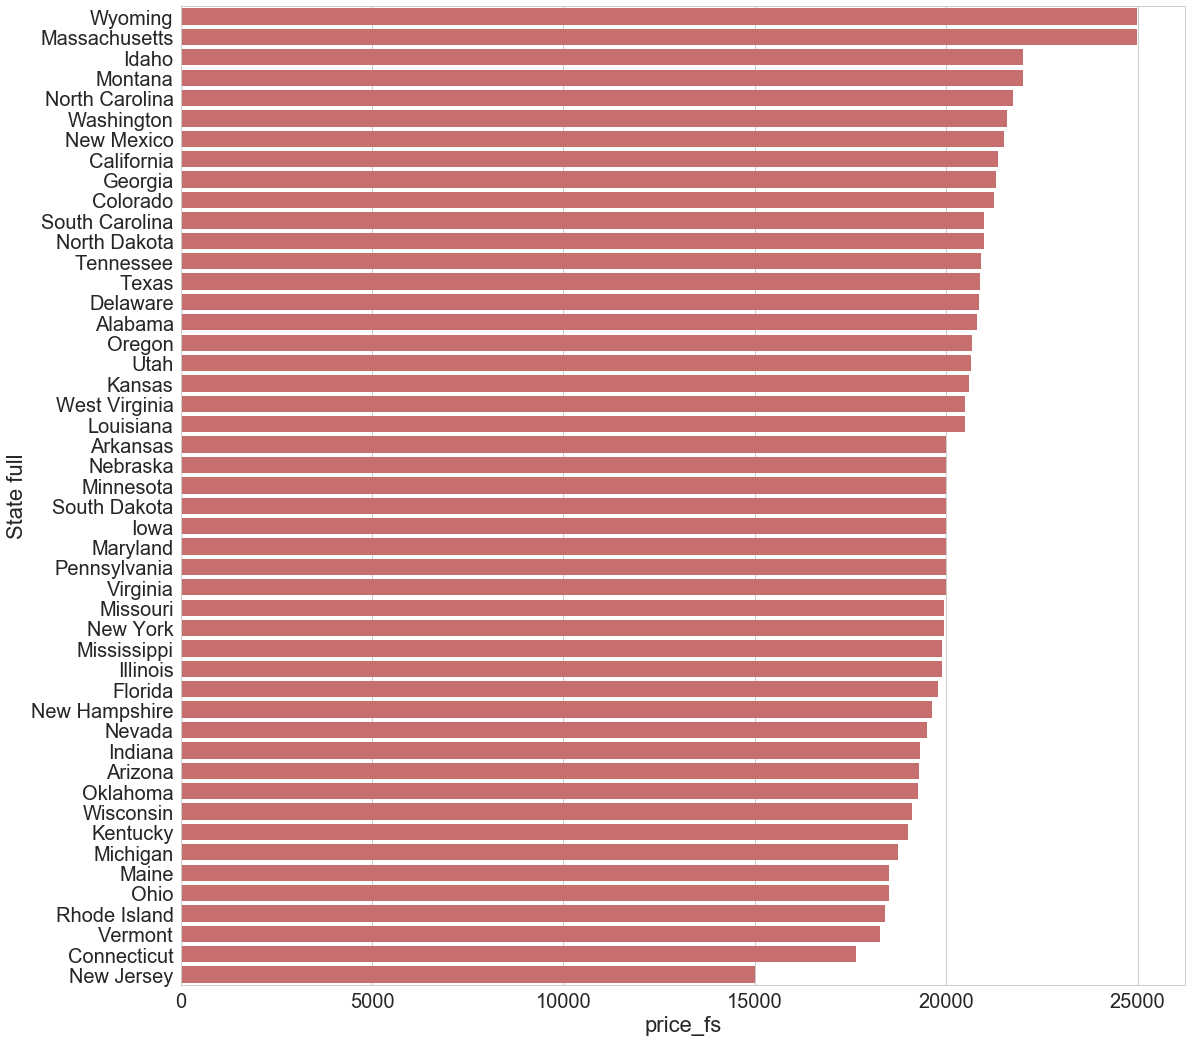

In [142]:
sns.set_color_codes("muted")
suv.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=suv, label="Median", color="r")

In [183]:
df[df["vehicle_type_ss"] == "SUV"]["State full"].value_counts().sort_values(ascending = False)

North Carolina    62641
Florida           41999
Texas             41150
California        34919
Georgia           29748
Pennsylvania      28432
New York          27997
Virginia          25173
Ohio              24899
Illinois          21547
Michigan          19837
South Carolina    18205
Wisconsin         16687
Tennessee         16685
Maryland          15488
Indiana           13250
Missouri          13206
Kansas             9266
Colorado           9148
Kentucky           9082
Minnesota          8580
Washington         8333
Alabama            8006
Iowa               7085
Arizona            5573
Oklahoma           5390
Nebraska           5132
Arkansas           4954
Utah               4615
Oregon             4420
Mississippi        3941
Louisiana          3548
Delaware           2521
Nevada             2210
Idaho              2083
West Virginia      1973
South Dakota       1609
New Mexico         1319
North Dakota       1296
Montana            1161
Wyoming            1058
Massachusetts   

## Car Median price by State

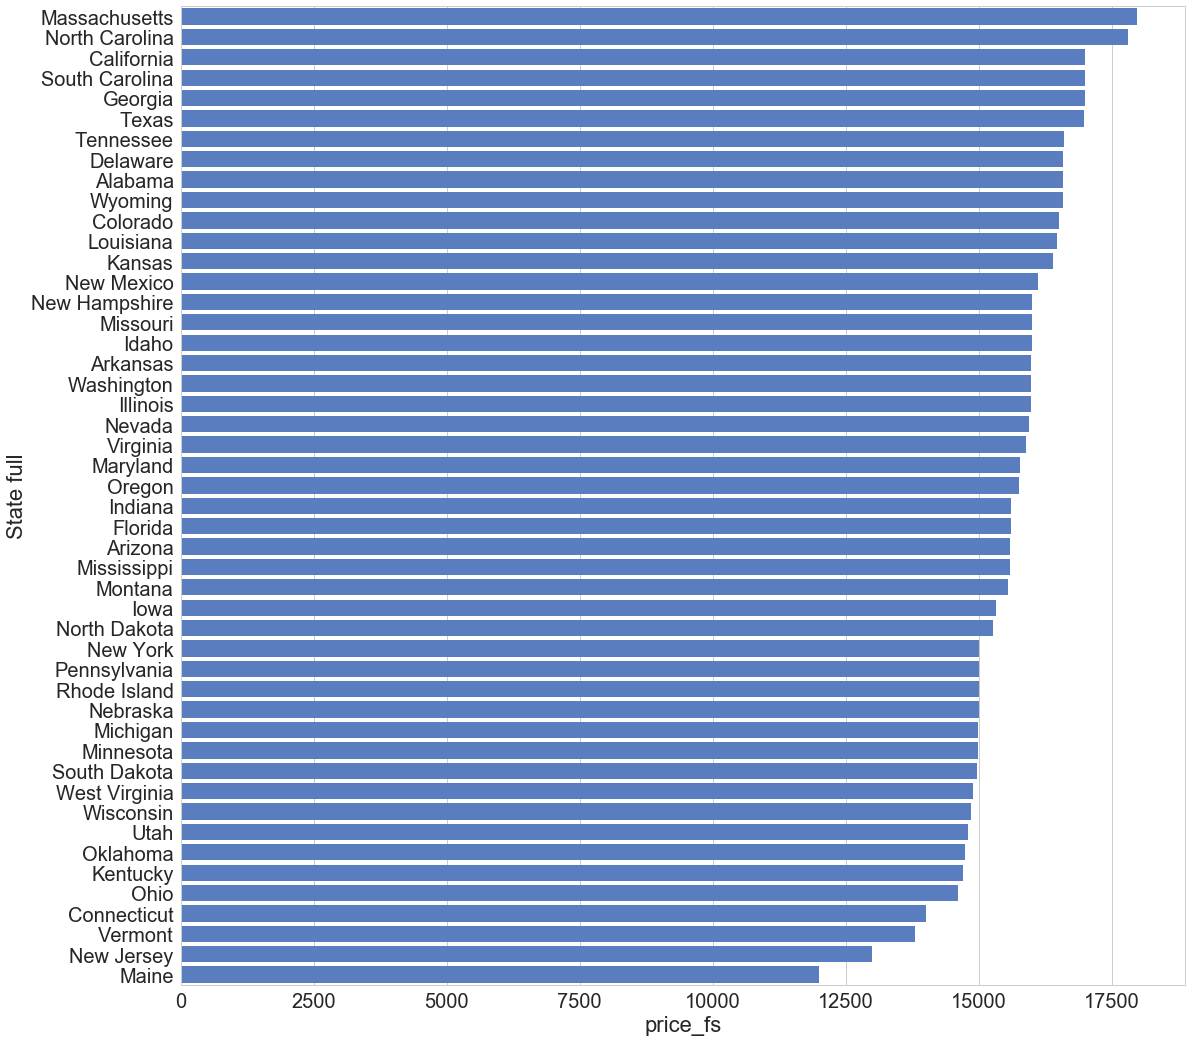

In [143]:
car.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=car, label="Median", color="b")

In [184]:
df[df["vehicle_type_ss"] == "Car"]["State full"].value_counts().sort_values(ascending = False)

North Carolina    64610
California        47934
Florida           47156
Texas             35750
Georgia           30694
Virginia          25088
New York          22814
Pennsylvania      22363
Ohio              22331
Illinois          18555
South Carolina    17853
Maryland          15058
Tennessee         15052
Michigan          13895
Wisconsin         13086
Missouri          11220
Indiana           11043
Washington         9278
Kansas             8151
Kentucky           8058
Alabama            7641
Colorado           6512
Arizona            6360
Minnesota          6346
Oregon             5089
Iowa               4477
Utah               4194
Arkansas           4027
Oklahoma           3841
Mississippi        3695
Nevada             3188
Nebraska           3166
Louisiana          2931
Delaware           2251
Idaho              1780
West Virginia      1352
New Mexico         1341
South Dakota        997
Massachusetts       908
North Dakota        788
Montana             690
New Jersey      

## Truck Median price by State

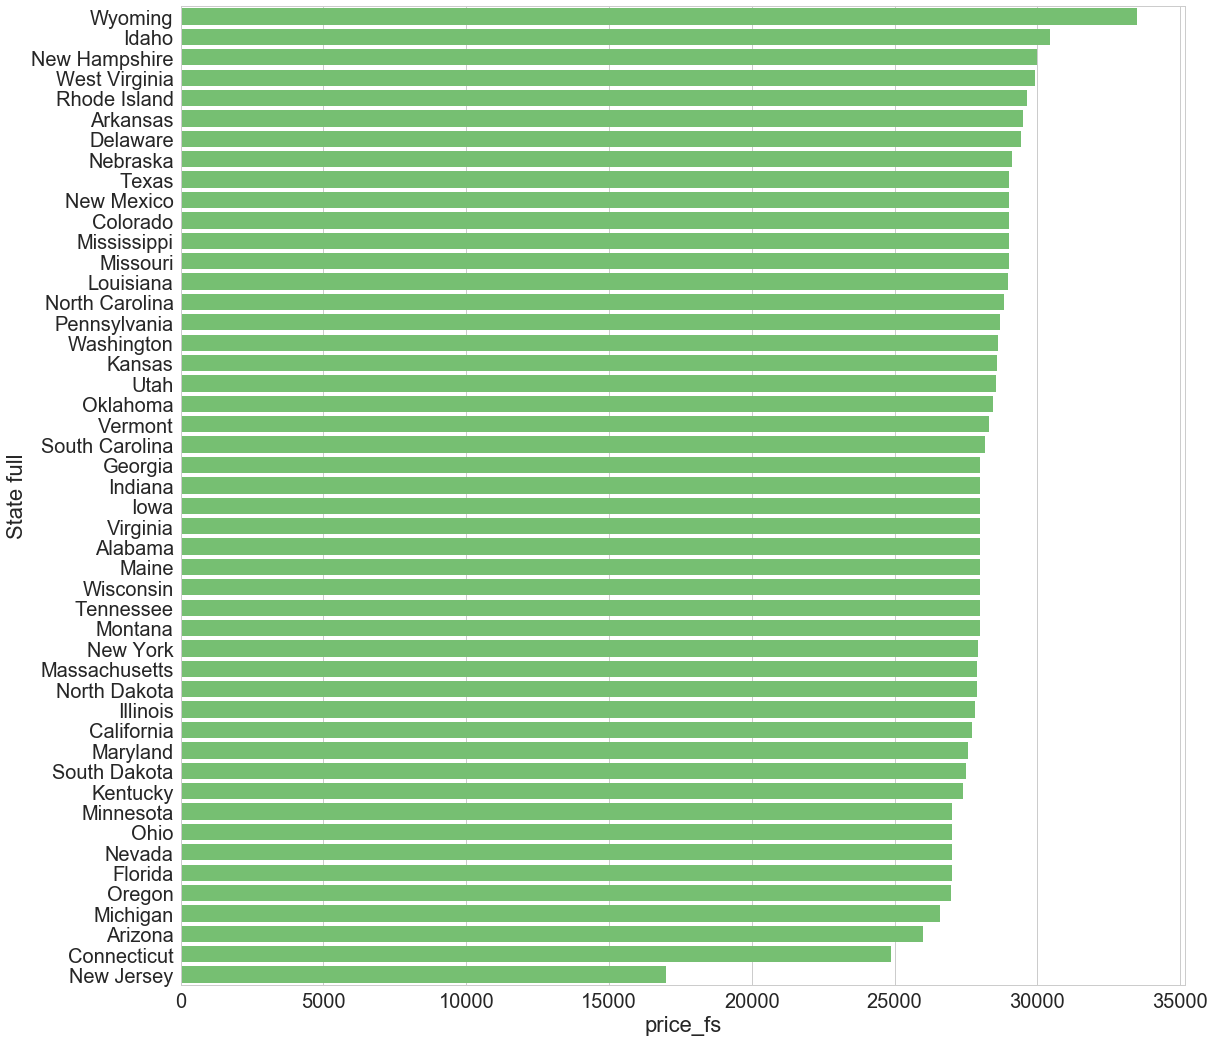

In [144]:
truck.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=truck, label="Median", color="g")

In [177]:
df[df["vehicle_type_ss"] == "Truck"]["State full"].value_counts().sort_values(ascending = False)

Texas             21705
North Carolina    17788
Florida           12286
California        10416
Ohio               9710
Georgia            9424
Pennsylvania       8727
New York           8114
Michigan           7999
Wisconsin          7577
Virginia           7576
Illinois           7223
Tennessee          6521
Indiana            5726
South Carolina     5612
Missouri           5556
Iowa               4450
Minnesota          4417
Kentucky           4349
Colorado           4319
Oklahoma           4277
Washington         4206
Maryland           3870
Nebraska           3862
Kansas             3467
Alabama            3337
Arkansas           2474
Mississippi        2346
Louisiana          2243
Utah               2243
Arizona            2158
Oregon             2146
Idaho              1951
South Dakota       1601
Wyoming            1287
Montana            1132
North Dakota       1038
West Virginia      1019
Nevada              933
Delaware            839
New Mexico          725
Massachusetts   

## Van Median price by State

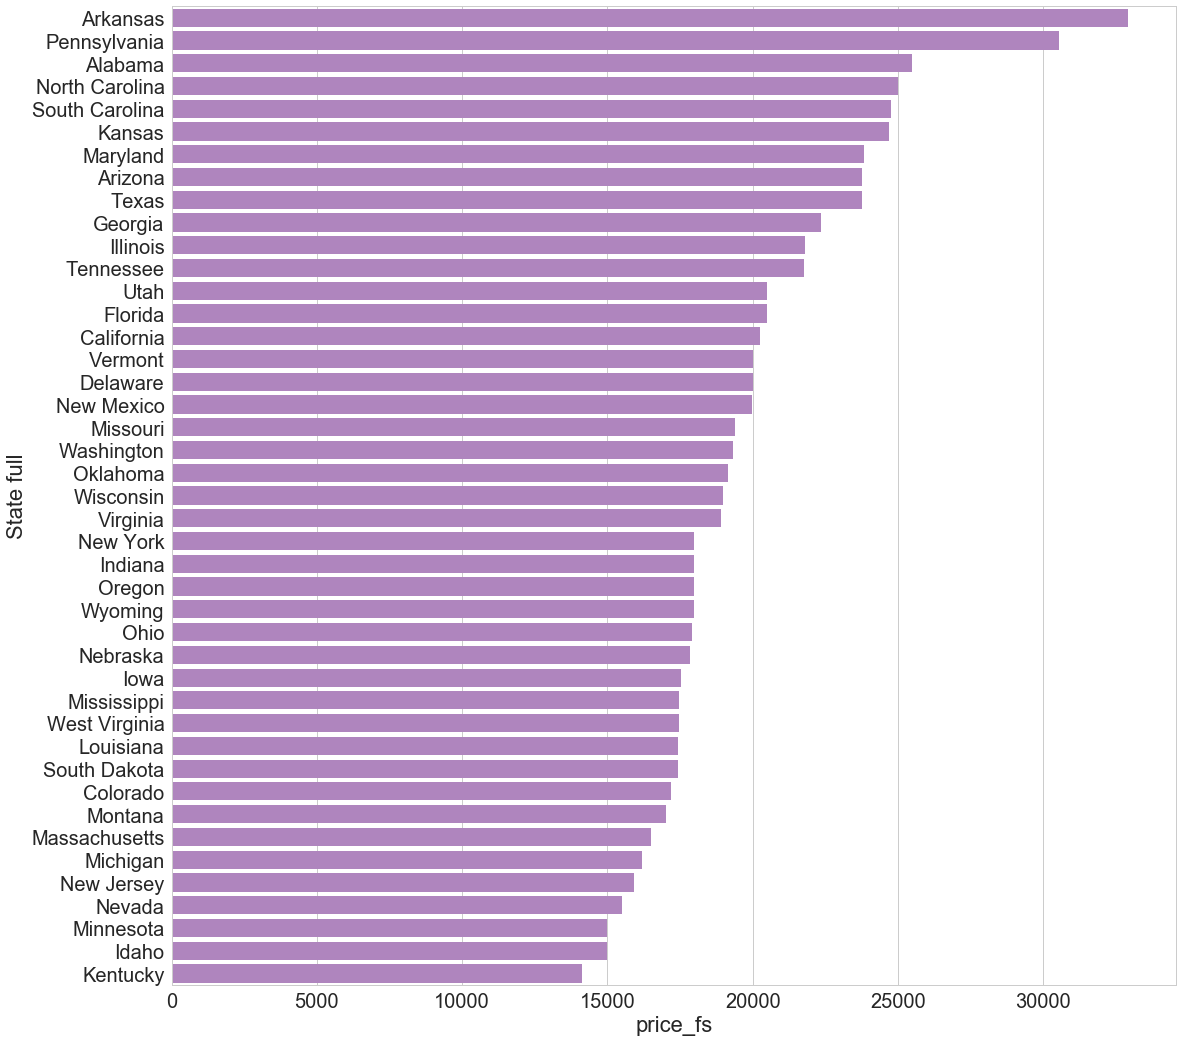

In [199]:
van.sort_values('price_fs', ascending=False, inplace=True)
sns.barplot(x="price_fs", y="State full", data=van, label="Median", color="m")

In [176]:
df[df["vehicle_type_ss"] == "Van"]["State full"].value_counts().sort_values(ascending = False)

North Carolina    255
California        236
Florida           145
Georgia           133
Texas             133
Pennsylvania      113
Virginia          101
Ohio               85
South Carolina     75
New York           70
Illinois           68
Missouri           57
Tennessee          56
Indiana            56
Maryland           52
Wisconsin          39
Michigan           36
Kansas             36
Oregon             36
Colorado           36
Alabama            35
Washington         30
Kentucky           28
Minnesota          27
Arizona            20
Utah               17
Nevada             17
Oklahoma           17
Arkansas           16
Iowa               14
Louisiana          12
New Mexico          9
Idaho               9
Delaware            8
Nebraska            8
Mississippi         6
Massachusetts       5
West Virginia       5
South Dakota        4
Wyoming             4
Montana             3
Vermont             2
New Jersey          1
Name: State full, dtype: int64

In [151]:
statemake = pd.DataFrame(df.groupby(['State full', 'make_ss']).mean())
statemake = statemake.reset_index()

## Heatmap of Median price of State and Make

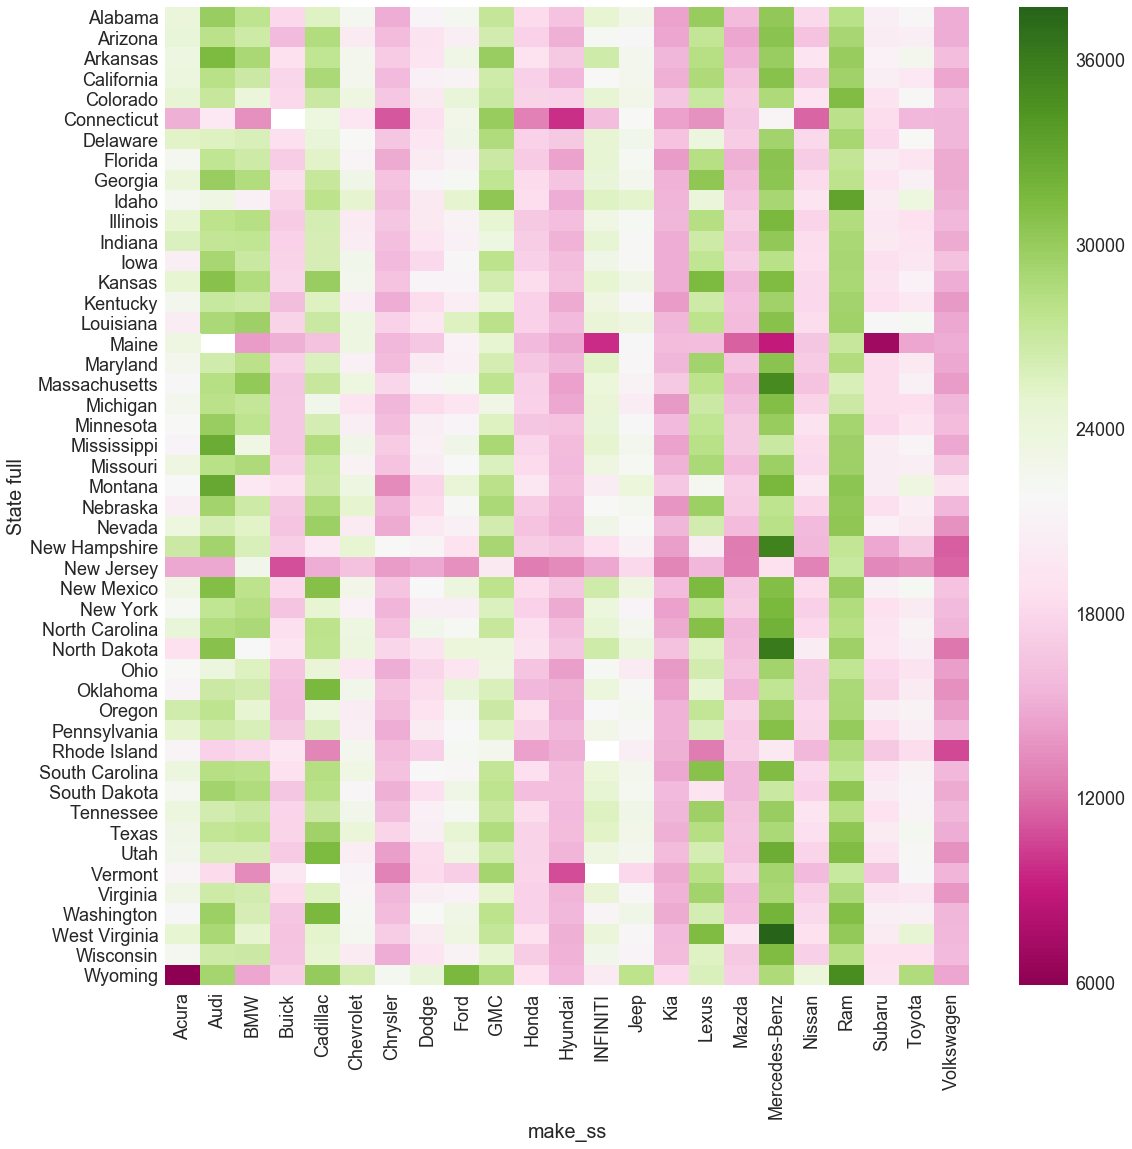

In [215]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("State full", "make_ss", "price_fs")
sns.heatmap(heaty, cmap="PiYG")#center=heaty.loc["Alabama", "Acura"])

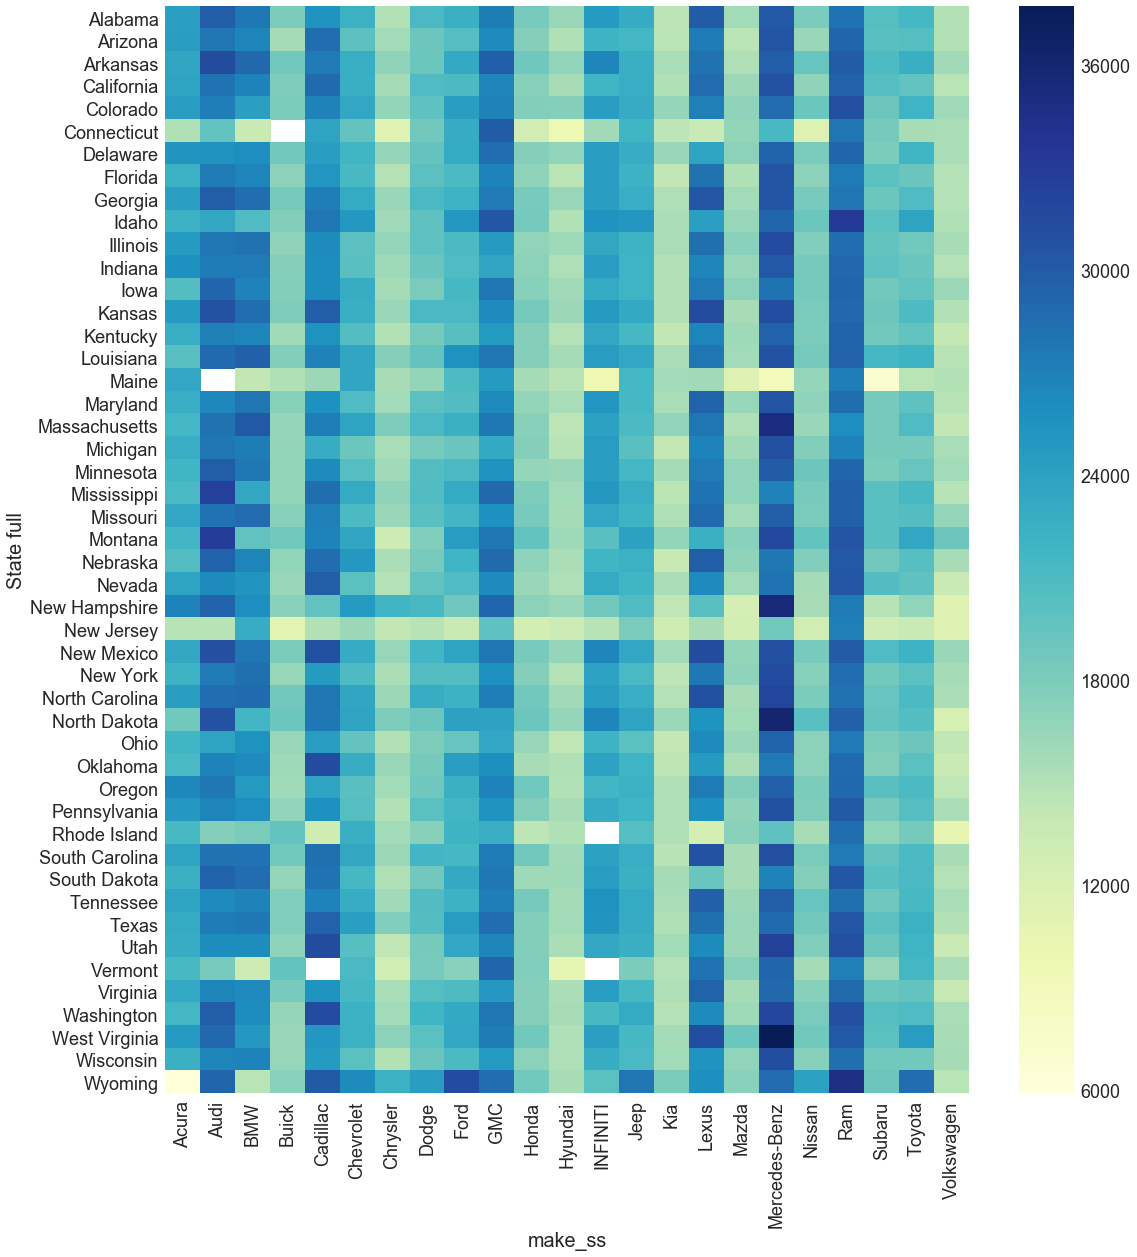

In [207]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 20))
heaty = statemake.pivot("State full", "make_ss", "price_fs")
sns.heatmap(heaty, cmap="YlGnBu")

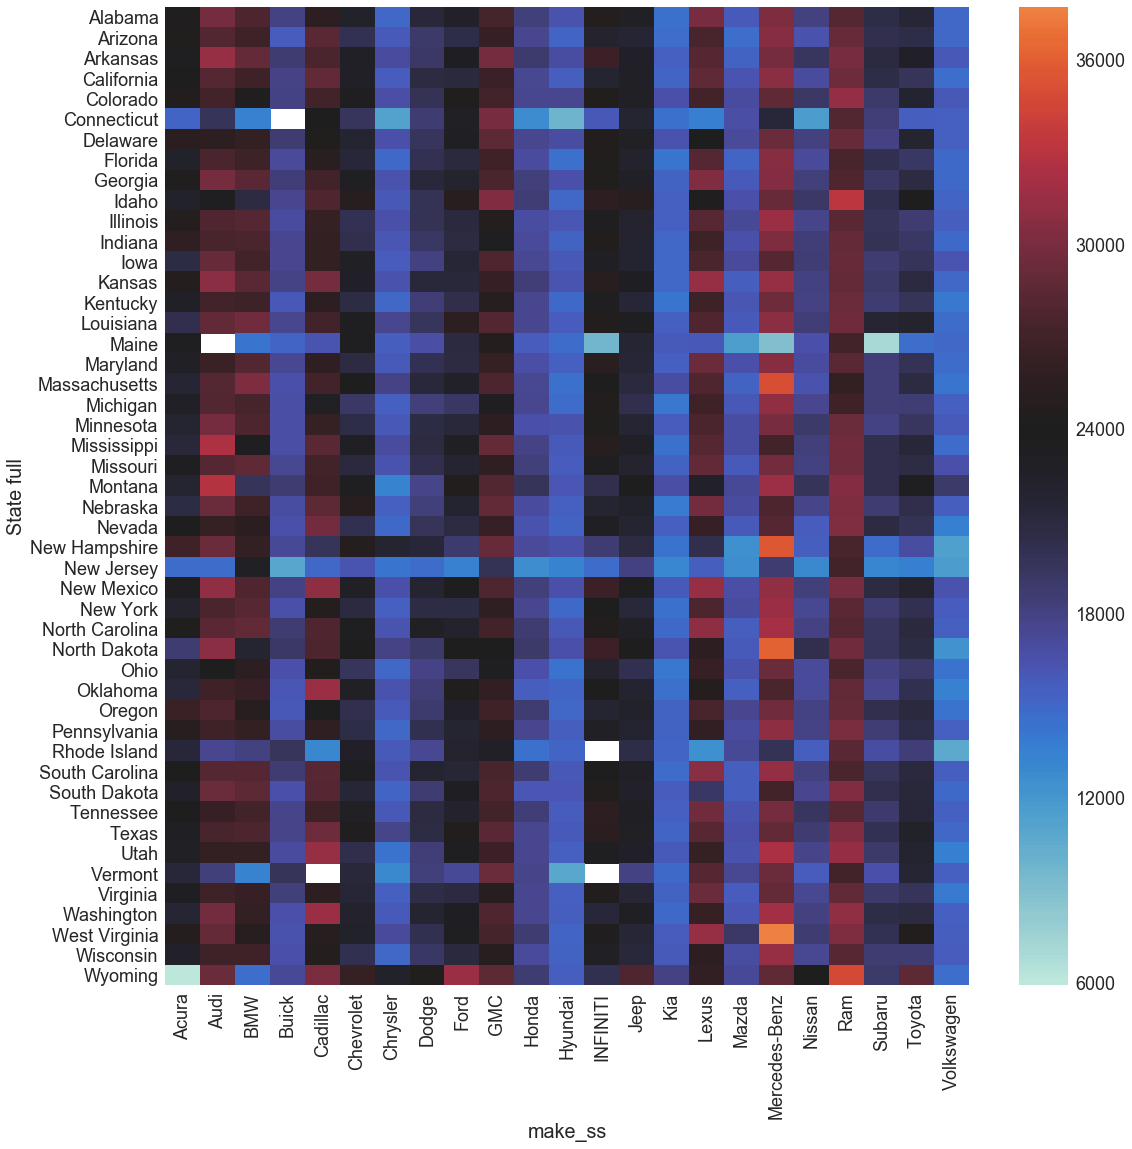

In [213]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("State full", "make_ss", "price_fs")
sns.heatmap(heaty, center=24000)

In [218]:
df[df["State full"] == "Maine"]["make_ss"].value_counts().sort_values(ascending = False)

Ford             57
Chevrolet        46
Jeep             27
Hyundai          23
Nissan           21
Subaru           20
GMC              20
Toyota           18
Kia              18
Honda            16
Dodge            10
Acura             8
Mazda             7
BMW               6
Volkswagen        6
Ram               5
Chrysler          4
Buick             4
Lexus             3
Cadillac          2
INFINITI          2
Mercedes-Benz     1
Name: make_ss, dtype: int64